# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

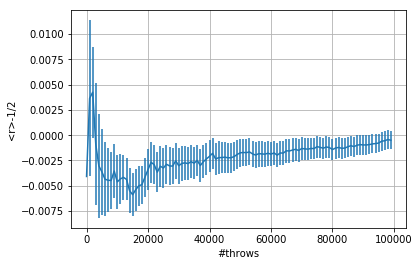

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
np.random.seed(0)     # Fixing random seed for reproducibility
r = np.random.rand(M) # U[0,1) uniform distribution
x = np.arange(N)      # [0,1,2,...,N-1]
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += r[k]
    ave[i] = sum/L       # r_i 
    av2[i] = (ave[i])**2 # (r_i)^2 

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
        su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,sum_prog-0.5,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

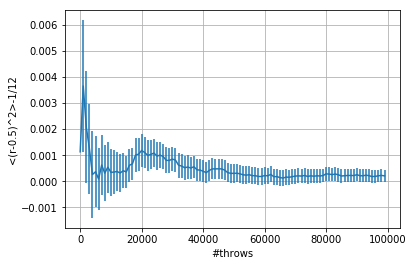

In [2]:
# Continue using variables and functions of the previous code cell
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += (r[k]-0.5)**2 # Accumulate measures
    ave[i] = sum/L           # Estimate in each block 
    av2[i] = (ave[i])**2 

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] 
        su2_prog[i] += av2[j] 
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    
plt.errorbar(x,sum_prog-1/12,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely.

## <font color="fuchsia">Exercise 01.1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
from scipy.stats import norm

In [2]:
# reading data from data_r.csv

data_r = np.genfromtxt("1/data_r.csv", dtype=float, delimiter=',')
M = int(data_r[0,0])
N = int(data_r[0,1])
sum_prog_r = data_r[1:, 0]
err_prog_r = data_r[1:, 1]

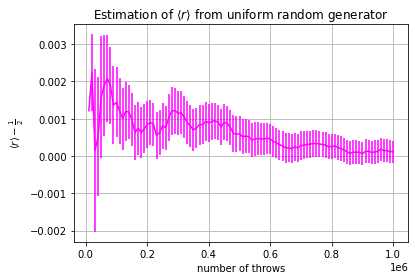

In [5]:
# plot progressive data

L = int(M/N)
x = [ i*L for i in range(1, N+1) ]  # progressive throws

plt.errorbar(x, sum_prog_r-0.5, yerr=err_prog_r, color='fuchsia')
plt.title(r"Estimation of $\langle r \rangle$ from uniform random generator")
plt.xlabel("number of throws")
plt.ylabel(r"$ \langle r \rangle - \frac{1}{2} $")
plt.grid(True)
plt.show()

<span style="color:purple"> 
    
The graph above shows the block averages of a sample of uniform random generator between 0 and 1, as a function of the number of throws involved in the average.
    
The plotted values come from $10^6$ extractions, divided into 100 blocks.
    
In the plot we can see that, while the number of throws grows, the quantity $\langle r \rangle - \frac {1}{2}$ approaches 0. By the right end of the graph, we can say that the value of $\langle r \rangle$ is consistent with the expected 1/2 because the difference is less than the error. The error seems plausible, since the variations of $\langle r \rangle$ are approximately as large as the bar of error.

In [8]:
# reading data from data_sigma.csv

data_sigma = np.genfromtxt('1/data_sigma.csv', dtype=float, delimiter=',')
M = int(data_sigma[0,0])
N = int(data_sigma[0,1])
sum_prog_sigma = data_sigma[1:, 0]
err_prog_sigma = data_sigma[1:, 1]

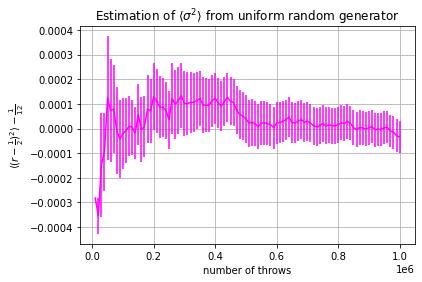

In [9]:
# plot progressive data

L = int(M/N)
x = [ i*L for i in range(1, N+1) ]  # progressive throws

plt.errorbar(x, sum_prog_sigma-1/12, yerr=err_prog_sigma, color='fuchsia')
plt.title(r"Estimation of $\langle \sigma ^2 \rangle$ from uniform random generator")
plt.xlabel("number of throws")
plt.ylabel(r"$ \langle (r - \frac{1}{2}) ^ 2 \rangle - \frac{1}{12} $")
plt.grid(True)
plt.show()

<span style="color:purple"> 
    
The graph above shows the block averages of $\langle (r  - \frac {1}{2})^2 \rangle - \frac{1}{12}$, sampled from a uniform random generator, as a function of the number of throws involved in the average.
    
The plotted values come from $10^6$ extractions, divided into 100 blocks.
    
From the plot we can say that the value of $\langle (r  - \frac {1}{2})^2 \rangle$ is consistent with the expected 1/12 because the difference is less than the error. The error seems to represent appropriately the variations of the value.

In [10]:
# reading data from data_chi2.csv

data_chi2 = np.genfromtxt('1/data_chi2.csv', dtype=float)
M = int(data_chi2[0])
n = int(data_chi2[1])
chi2 = data_chi2[2:]

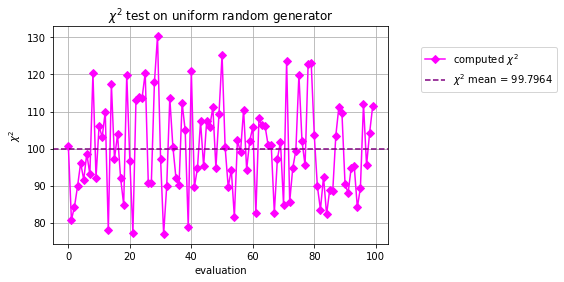

In [11]:
# plot data

plt.plot(chi2, label=r"computed $\chi ^2$", color='fuchsia', marker='D')
plt.axhline(y=np.average(chi2), linestyle='--', color='purple', label=(r"$\chi ^2$ mean = "+str(np.average(chi2))))
plt.title(r"$\chi ^2$ test on uniform random generator")
plt.xlabel("evaluation")
plt.ylabel(r"$ \chi ^2$")
plt.grid(True)
plt.legend(loc=(1.1,0.7))
plt.show()

<span style="color:purple"> 

The chi square test aims at checking the uniformity of the distribution. We shall expect that every bin has roughly the same counts, if the distribution is really uniform. 
    
The plot shows that this hypotesis is plausible, since the value of chi square oscillates around the expected value of 100. The fluctuations are circa $\pm20$ units around 100, that is circa $2\sigma$: we saw that $\sigma^2 \simeq \langle X \rangle$, so $\sigma \simeq 10$.

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note that you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

## <font color="fuchsia">Exercise 01.2

In [12]:
# read data from dice.csv

uniform_dice, exponential_dice, cauchylorentz_dice = np.genfromtxt('2/dice.csv', dtype=float, delimiter=',', unpack=True)

N = [1, 2, 10, 100]

FIT PARAMETERS:	mu = 0.5000108001 	sigma = 0.029037794697737294


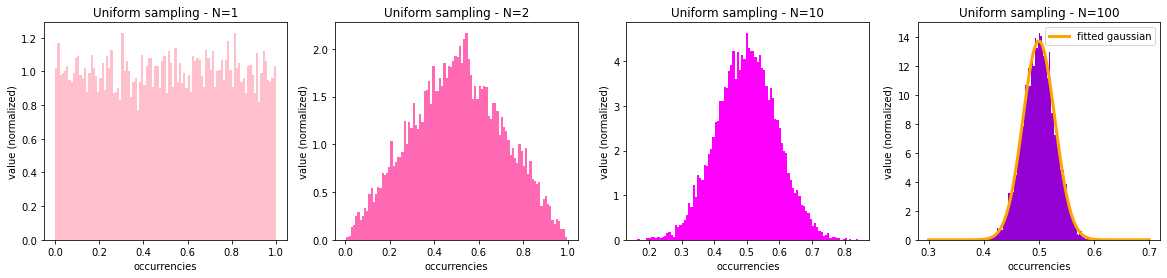

In [13]:
#plot uniform dice

n_bins = 100

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))

n, bins, patches = ax1.hist(uniform_dice[0:10000], n_bins, color='pink', density=True)
n, bins, patches = ax2.hist(uniform_dice[10000:20000], n_bins, color='hotpink', density=True)
n, bins, patches = ax3.hist(uniform_dice[20000:30000], n_bins, color='fuchsia', density=True)
n, bins, patches = ax4.hist(uniform_dice[30000:40000], n_bins, color='darkviolet', density = True)

for i in range(4):
    globals()['ax'+str(i+1)].set_title(f'Uniform sampling - N={N[i]}')
    globals()['ax'+str(i+1)].set_xlabel(f'occurrencies')
    globals()['ax'+str(i+1)].set_ylabel(f'value (normalized)')

# gaussian fit
mu, std = norm.fit(uniform_dice[30000:40000])

x = np.linspace(0.3, 0.7, 100)
p = norm.pdf(x, mu, std)
ax4.plot(x, p, color='orange', linewidth=3, label='fitted gaussian')
ax4.legend()

print('FIT PARAMETERS:\tmu =', mu, '\tsigma =', std)

FIT PARAMETERS:	mu = 0.9998264965999999 	sigma = 0.09851158906206817


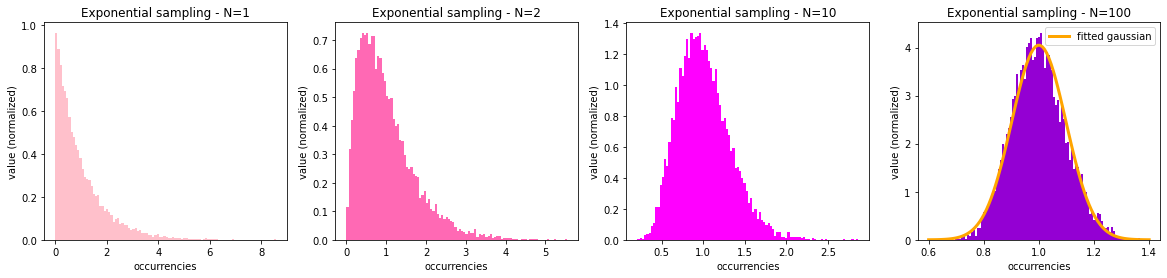

In [14]:
#plot exponential dice

n_bins = 100

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))

n, bins, patches = ax1.hist(exponential_dice[0:10000], n_bins, color='pink', density=True)
n, bins, patches = ax2.hist(exponential_dice[10000:20000], n_bins, color='hotpink', density=True)
n, bins, patches = ax3.hist(exponential_dice[20000:30000], n_bins, color='fuchsia', density=True)
n, bins, patches = ax4.hist(exponential_dice[30000:40000], n_bins, color='darkviolet', density=True)

for i in range(4):
    globals()['ax'+str(i+1)].set_title(f'Exponential sampling - N={N[i]}')
    globals()['ax'+str(i+1)].set_xlabel(f'occurrencies')
    globals()['ax'+str(i+1)].set_ylabel(f'value (normalized)')
    
# gaussian fit
mu, std = norm.fit(exponential_dice[30000:40000])

x = np.linspace(0.6, 1.4, 100)
p = norm.pdf(x, mu, std)
ax4.plot(x, p, color='orange', linewidth=3, label='fitted gaussian')
ax4.legend()

print('FIT PARAMETERS:\tmu =', mu, '\tsigma =', std)

FIT PARAMETERS:	mu = -0.010155445369008923 	gamma = 1.0041842049789673


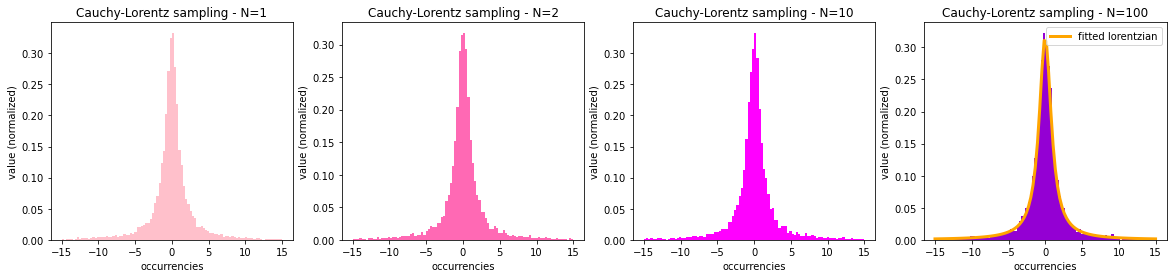

In [15]:
#plot cauchy-lorentz dice

n_bins = 100

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))

n, bins, patches = ax1.hist(cauchylorentz_dice[0:10000], n_bins, range=(-15, 15), color='pink', density=True)
n, bins, patches = ax2.hist(cauchylorentz_dice[10000:20000], n_bins, range=(-15, 15), color='hotpink', density=True)
n, bins, patches = ax3.hist(cauchylorentz_dice[20000:30000], n_bins, range=(-15, 15), color='fuchsia', density=True)
n, bins, patches = ax4.hist(cauchylorentz_dice[30000:40000], n_bins, range=(-15, 15), color='darkviolet', density=True)

for i in range(4):
    globals()['ax'+str(i+1)].set_title(f'Cauchy-Lorentz sampling - N={N[i]}')
    globals()['ax'+str(i+1)].set_xlabel(f'occurrencies')
    globals()['ax'+str(i+1)].set_ylabel(f'value (normalized)')

# cauchy fit
mu, gamma = stats.cauchy.fit(cauchylorentz_dice[30000:40000])

x = np.linspace(-15, 15, 100)
p = stats.cauchy.pdf(x, mu, gamma)
ax4.plot(x, p, color='orange', linewidth=3, label='fitted lorentzian')
ax4.legend()

print('FIT PARAMETERS:\tmu =', mu, '\tgamma =', gamma)

<span style="color:purple"> 
  
This exercise shows the central limit theorem in action.
    
For the first two distributions (uniform and exponential) we see that the shape of the distribution approaches that of a gaussian as the number of values used to compute the average increases from 0 to 40000.
The third distribution (lorentzian), on the contrary, does not approach a gaussian, but remains a lorentzian, with the same parameters.
    
This is exactly what we shall expect: both exponential and uniform distributions respect the theorem and their basin of attraction is the gaussian distribution. The lorentzian also respects the theorem but does not converge to a gaussian: its basin of attraction is the distribution itself.

### Exercise 01.3
- **Simulate** the Buffonâ€™s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

## <font color="fuchsia">Exercise 01.3

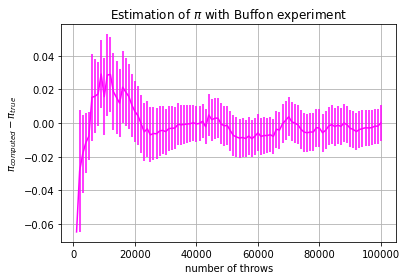

In [22]:
# plot progressive data

M = 100000
N = 100
L = int(M/N)
x = [ i*L for i in range(1, N+1) ]  # progressive throws

plt.errorbar(x, sum_prog_pi-math.pi, yerr=err_prog_pi, color='fuchsia')
plt.title(r"Estimation of $\pi$ with Buffon experiment")
plt.xlabel("number of throws")
plt.ylabel(r"$\pi_{computed} - \pi_{true} $")
plt.grid(True)
plt.show()

<span style="color:purple"> 
    
The graph above shows the prediction of $\pi$ from Buffon's experiment.
    
To get the first end of the needle we extracted a random number that acted as the coordinate y in (0,1). The coordinate x was not necessary because we just needed to know if the needle intersects the line or not, and that is given knowing the two y.
In this case, instead of using the value of $\pi$ to sample the positions, we used 2 random uniform values, $u \in [-1, 1]$ and $v \in [0, 1]$ and computed $ sin (\theta) = \frac{2uv}{u^2+v^2} $ to extract the other y end of the needle as $y_1 + L sin (\theta)$.
    
This simulation of Buffon's experiment shows that the predicted value of $\pi$ is compatible with the true value, and the error reflects its dispersion. The estimation gets more accurate as the number of throws grows, just like we expected it to do.

### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
    What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
    At this point everything becomes clear:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?